<a href="https://colab.research.google.com/github/lauranorenab/Proyecto_Modelos_2/blob/main/EDA_Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
import os
from google.colab import files
import scipy.io

## Descripción

La base de datos Car Evaluation se originó a partir de un modelo de decisión jerárquico simple que evalúa los automóviles de acuerdo a su estructura (variables categóricas en la base de datos) determinando así su nivel de aceptabilidad (variable también categórica que puede tomar los valores: unacceptable, acceptable, good, very good)

## Lectura del Dataset

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets

In [6]:
df_car = pd.concat([X_car, y_car], axis=1)

## Exploración de datos

In [14]:
X_car.shape, y_car.shape

((1728, 6), (1728, 1))

In [15]:
X_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
dtypes: object(6)
memory usage: 81.1+ KB


In [16]:
X_car.head(15)

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
5,vhigh,vhigh,2,2,med,high
6,vhigh,vhigh,2,2,big,low
7,vhigh,vhigh,2,2,big,med
8,vhigh,vhigh,2,2,big,high
9,vhigh,vhigh,2,4,small,low


In [17]:
X_car.tail(15)

,buying,maint,doors,persons,lug_boot,safety
1713,low,low,5more,4,med,low
1714,low,low,5more,4,med,med
1715,low,low,5more,4,med,high
1716,low,low,5more,4,big,low
1717,low,low,5more,4,big,med
1718,low,low,5more,4,big,high
1719,low,low,5more,more,small,low
1720,low,low,5more,more,small,med
1721,low,low,5more,more,small,high
1722,low,low,5more,more,med,low


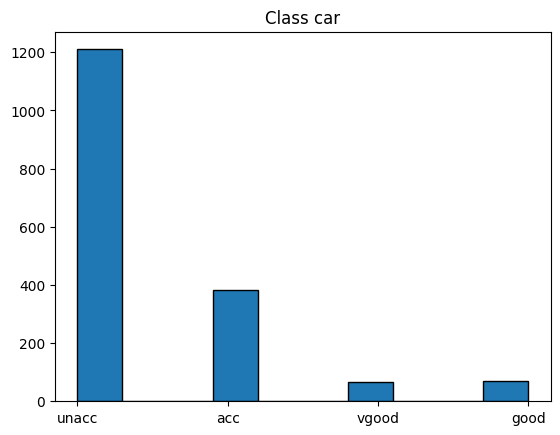

In [18]:
plt.title('Class car')
plt.hist(y_car['class'], edgecolor='black', linewidth=1)
plt.show()

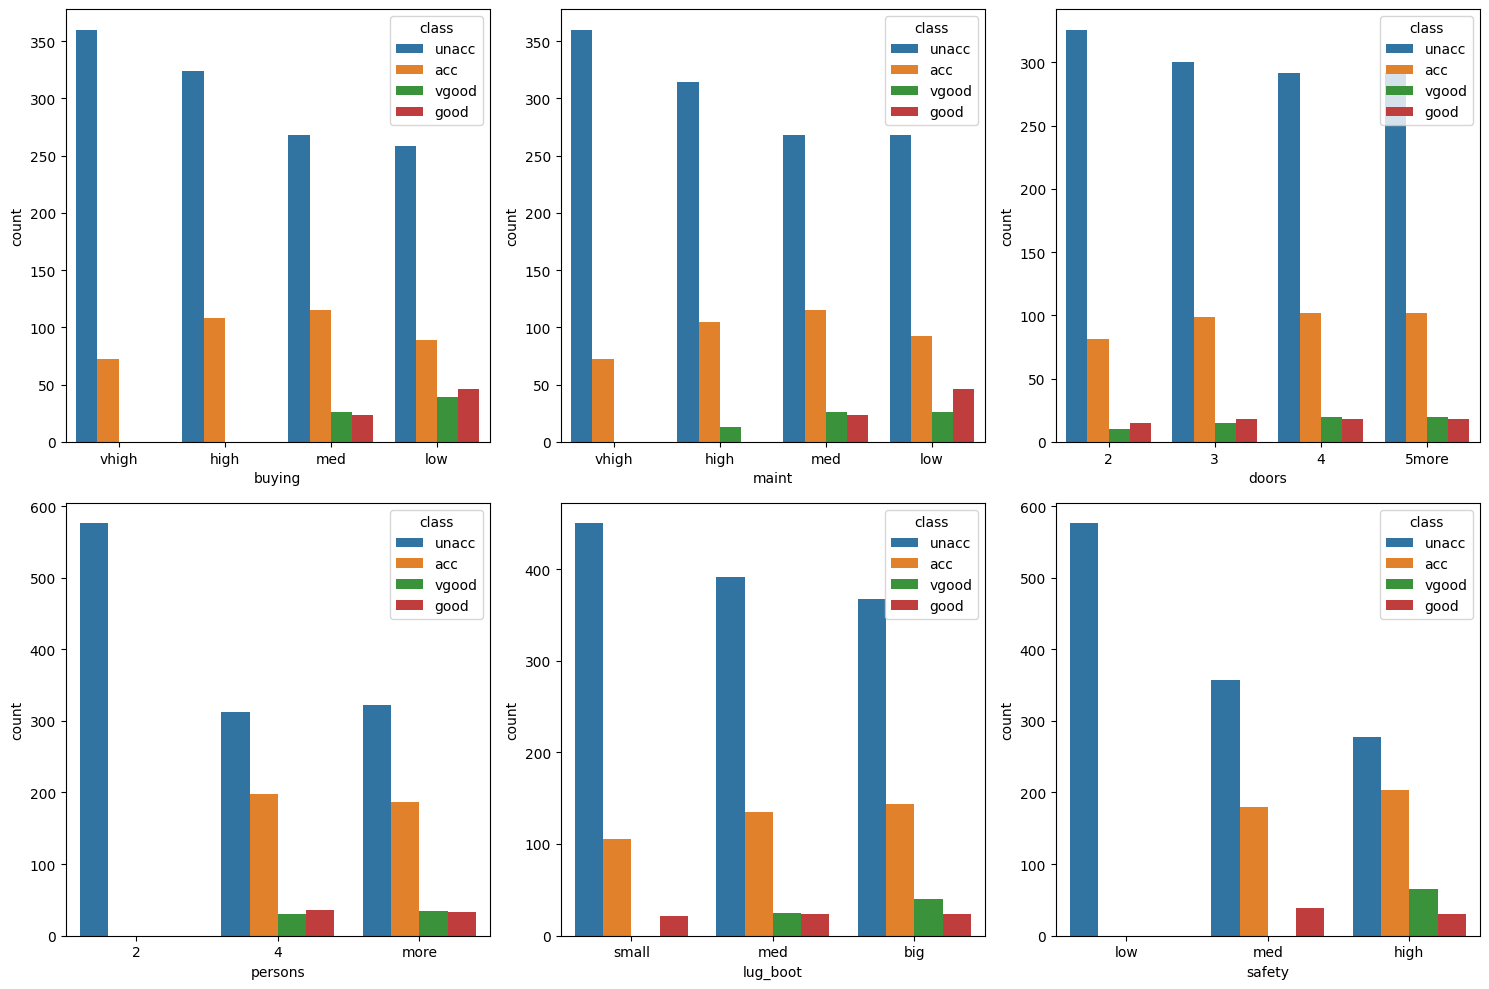

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Lista de categorías
categorias = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Iterar sobre las categorías y dibujar un diagrama de barras para cada una
for i, categoria in enumerate(categorias):
    row = i // 3  # Calcular la fila actual
    col = i % 3   # Calcular la columna actual
    sns.countplot(x=categoria, hue='class', data=df_car, ax=axes[row, col])

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


**Conclusión**: Los datos se encuentran desbalanceados con respecto a la categoría 'unacc' de la variable respuesta. Por otro lado, la variable 'acc' es la que presenta mayor balance.

## Análisis de datos faltantes

In [24]:
missing_data = pd.DataFrame({'total_missing': X_car.isnull().sum(), 'perc_missing': (X_car.isnull().sum()/1728)*100})
missing_data

,total_missing,perc_missing
buying,0,0.0
maint,0,0.0
doors,0,0.0
persons,0,0.0
lug_boot,0,0.0
safety,0,0.0


**Conclusión**: El dataset no presenta valores faltantes, por lo que no es necesario realizar un análisis en este aspecto.

## Valores duplicados

In [25]:
X_car[X_car.duplicated(keep=False)]

,buying,maint,doors,persons,lug_boot,safety


**Conclusión**: El dataset no presenta valores duplicados, por lo que no es necesario realizar un análisis en este aspecto.

## Análisis de datos atípicos

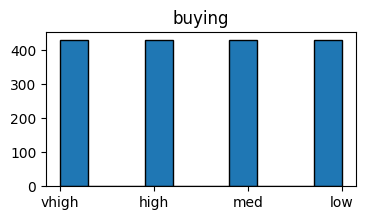

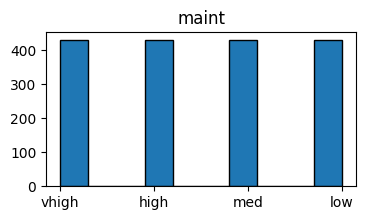

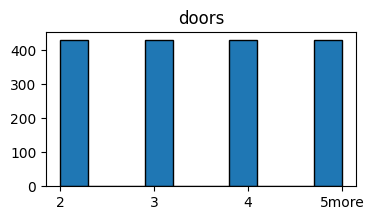

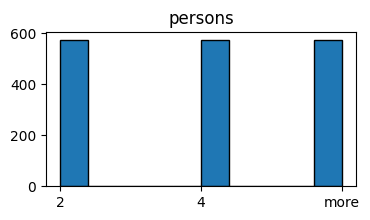

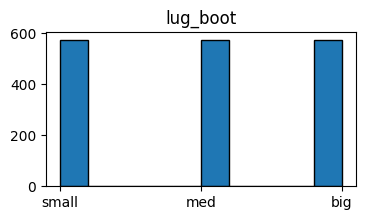

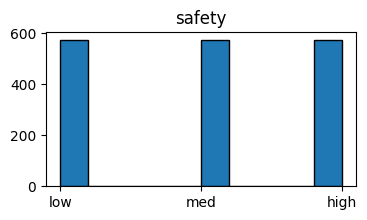

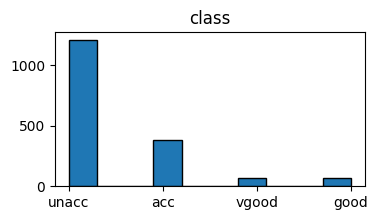

In [26]:
fig_size = (4, 2)
for column in df_car.columns:
    plt.figure(figsize=fig_size)
    plt.title(column)
    plt.hist(df_car[column], edgecolor='black', linewidth=1)
    plt.show()

**Conclusión**: Debido a que todas las variables del dataset son categóricas, no se puede utilizar el mismo enfoque para identificar datos atípicos como en variables numéricas, entonces, se opta por analizar la frecuencia de las categorías presentes en cada columna de la base de datos. Por lo tanto, se evidencia que no hay existencia de posibles datos atípicos ya que en seis de las siete columnas, sus categorías tienen la misma frecuencia. En la séptima columna (la variable respuesta) se evidencia un desbalanceo en cuánto a la frecuencia de la categoría inaceptable pero no se considera que haya una categoría atípica, solo datos desbalanceados.